# Aula 19: Método de Monte Carlo

A aula teórica está nos slides que acompanham o curso no github.

Para aprender a utilizar a técnica iremos aplicá-la a um problema simples: Determinar o valor de pi a partir de um número aleatório de pontos.

## Determinando pi usando Monte Carlo

- Suponha um quadrado de lado 1 e um semi-círculo centrado no canto inferior esquerda do quadrado e também de raio 1, igual à Figura 1 da aula teórica. A área do semi-círculo será $A_{SC} = \frac{\pi R^2}{4}$. Como $R=1$, então $A_{SC} = \frac{\pi}{4}$. A área do quadrado é $A = L^2 = 1$.
- Suponha que são atirados dardos aleatoriamente nesse quadrado onde a probabilidade de atingir qualquer região do quadrado siga uma distribuição uniforme. Teremos que, do número total de dardos atirados ($n_T$), alguns irão acertar a região do semi-círculo ($n_{SC}$).
- Se a probabilidade é uniforme, então quanto mais dardos são atirados, a razão entre o número de dardos que atingiram o semicírculo em relação ao número total de dardos se aproxima da razão entre as áreas do semi-círculo e do quadrado:

$$\lim_{n\to\infty}\frac{n_{SC}}{n_T} = \frac{A_{SC}}{A}$$
$$\lim_{n\to\infty}\frac{n_{SC}}{n_T} = \frac{\pi}{4}$$

Logo, podemos determinar pi como:

$$\pi = 4\lim_{n\to\infty}\frac{n_{SC}}{n_T}$$

In [1]:
# Vamos importar o numpy para gerar os números aleatórios e o matplotlib para visualizar a distribuição
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Utilizamos a função "uniform" do módulo "random" do numpy para gerar números aleatórios com distribuição uniforme.
# size significa o número de pontos dentro desta distribuição que serão retornados.
x = np.random.uniform(size=1000)
y = np.random.uniform(size=1000)

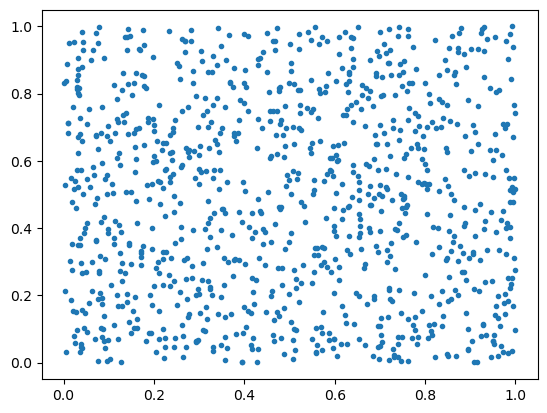

In [3]:
# Para visualizarmos os locais onde todos os pontos caíram
# Note que são números aleatórios, então cada vez que rodamos a distribuição será diferente.
plt.plot(x, y, '.')

In [4]:
# Vamos gerar uma máscara que nos diz quais são os pontos que estão dentro do semi-círculo
r = np.sqrt(x**2 + y**2)
mask = r < 1

In [5]:
mask

array([False,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,

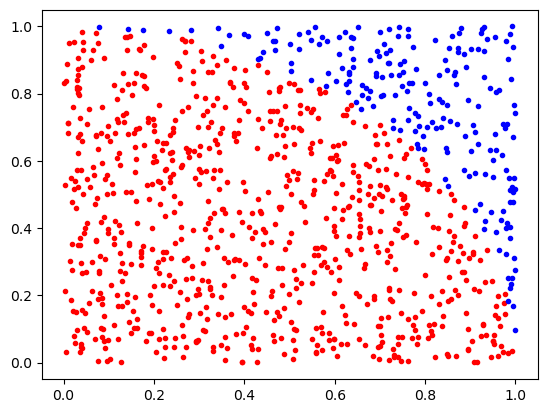

In [6]:
# Utilizamos essa máscara para visualizar os dados
# ~mask significa que a inversa da lista de True e False
plt.plot(x[mask], y[mask], '.', color='red')
plt.plot(x[~mask], y[~mask], '.', color='blue')

In [7]:
# Se quisermos saber pi, precisamos saber o número de pontos dentro da máscara que são True,
# pra isso basta somar a máscara
nsc = mask.sum()
print(nsc)

795


In [8]:
# Com isso, o valor de pi será
pi = 4*nsc/1000
print(pi)

3.18


Note que o valor de pi ainda não possui a precisão necessária para ser utilizada. Vamos aumentar o número de pontos

In [9]:
# Vamos repetir tudo o que foi feito, mas colocando dentro de uma função para facilitar seu uso:
def calc_pi(n):
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    r = np.sqrt(x**2 + y**2)
    mask = r < 1
    pi = 4*mask.sum()/n
    return pi

In [10]:
# Calculando com 10 milhões de pontos
calc_pi(10_000_000)

3.1415212

## Propagação das barras de erro

No exemplo anterior utilizamos uma distribuição uniforme para gerar os pontos aleatórios. Agora, vamos trabalhar com quantidades físicas que possuem distribuição normal.

In [11]:
# Para gerar pontos aleatórios com distribuição normal no python, utilizamos a função "normal" do módulo "random" do numpy.
# O primeiro valor é a média, o segundo é o desvio padrão e o terceiro é o número de pontos a serem gerados
v = np.random.normal(0, 1, size=10000)

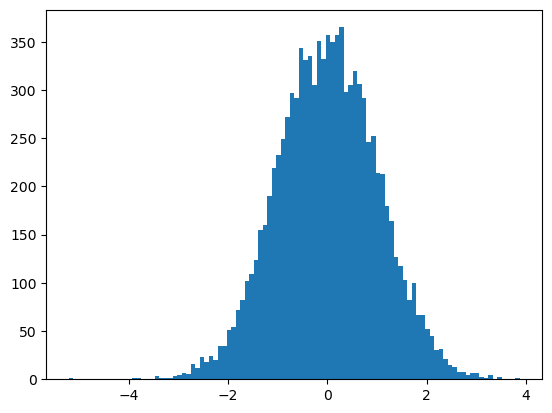

In [12]:
# Para visualizar a distribuição de pontos, utilizamos a função "hist" do matplotlib que fará um histograma dos pontos
h = plt.hist(v, 100)

Como aplicação, vamos calcular a posição final e a barra de erro de uma pedra que foi atirada com velocidade constante. Porém:
- A posição inicial da pedra foi medida como estando na origem, com uma barra de erro de 0,5 cm.
- A velocidade da pedra foi medida como 10 m/s com uma barra de erro de 5 cm/s
- Considerando as incertezas, qual será a posição final da pedra?

As barras de erro de uma medida possuem uma distribuição normal. Ou seja, a probabilidade de um valor aleatório estar perto da média é maior do que estar longe dela.

In [13]:
import astropy.units as u

In [14]:
x0 = np.random.normal(0, 0.5, size=10000)*u.cm
v = np.random.normal(1000, 5, size=10000)*u.cm/u.s

In [15]:
t = 100*u.s

In [16]:
# Agora calculamos a posição final normalmente utilizando a equação de MRU
xf = x0 + v*t

In [17]:
# xf é uma distribuição uniforme para a posição final. Seu valor médio será
xf.mean().to(u.m)

<Quantity 999.96546002 m>

In [18]:
# A barra de erro em 1 sigma é dado pelo desvio padrão
xf.std().to(u.m)

<Quantity 5.04897955 m>

Logo, a posição final da pedra será $x_f = 1000 \pm 5$ m.